BOOK Sales EDA 



In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [99]:
df=pd.read_csv("Books_Data_Clean.csv")

In [100]:
df.head(5)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [102]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [103]:
df=df[df['Publishing Year']>1900]

In [104]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [105]:
df.dropna(subset="Book Name",inplace=True)

In [106]:
df.duplicated().sum()

np.int64(0)

In [107]:
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

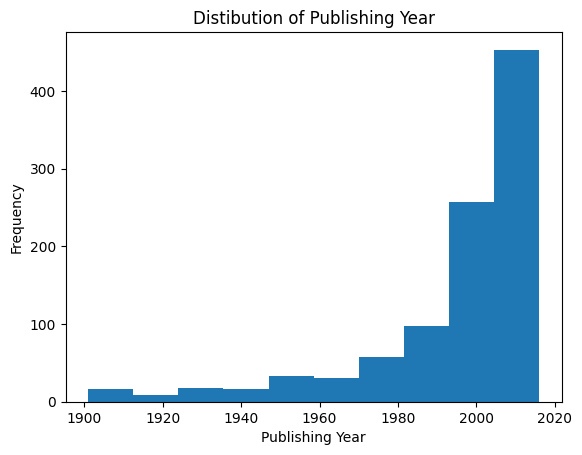

In [108]:
plt.hist(df['Publishing Year'])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distibution of Publishing Year")
plt.show()

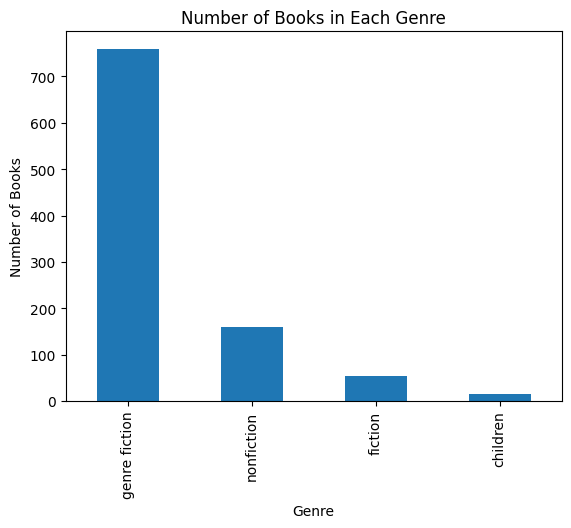

In [109]:
df['genre'].value_counts().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of Books in Each Genre")
plt.show()

In [110]:
df.groupby("Author")["Book_average_rating"].mean()

Author
A.A. Milne, Ernest H. Shepard                      4.36
A.S.A. Harrison                                    3.30
Abbi Glines                                        4.21
Adam Johnson                                       4.06
Adam Mansbach, Ricardo CortÃ©s                     4.26
                                                   ... 
William Styron                                     4.18
Yana Toboso, Tomo Kimura                           4.37
Zadie Smith                                        3.75
Ø£Ø­Ù„Ø§Ù… Ù…Ø³ØªØºØ§Ù†Ù…ÙŠ, Ahlam Mosteghanemi    3.72
Ø£Ø­Ù…Ø¯ Ù…Ø±Ø§Ø¯                                  3.80
Name: Book_average_rating, Length: 669, dtype: float64

In [111]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

Text(0.5, 1.0, 'Box Plot of Book Rating Count')

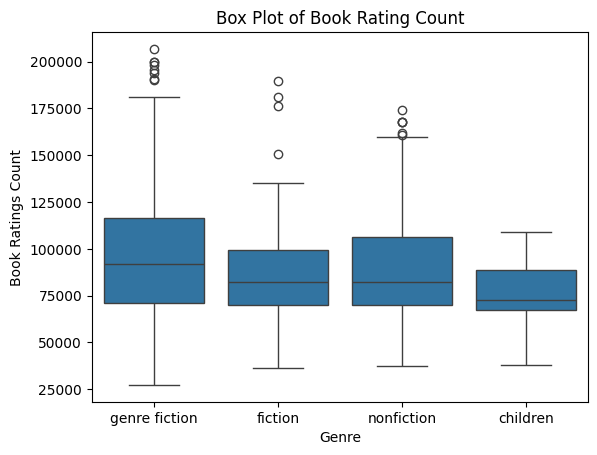

In [112]:
sns.boxplot(x="genre",y="Book_ratings_count",data=df)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Box Plot of Book Rating Count")

Text(0, 0.5, 'Units Sold')

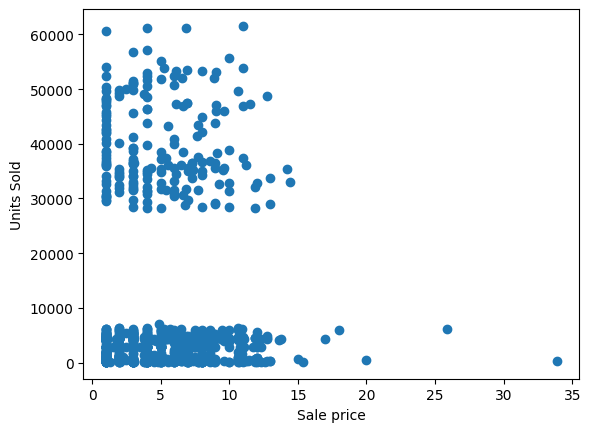

In [113]:
plt.scatter(df["sale price"],df['units sold'])
plt.xlabel("Sale price")
plt.ylabel("Units Sold")

In [114]:
language_counts=df['language_code'].value_counts()

Text(0.5, 1.0, 'Language distribution of books')

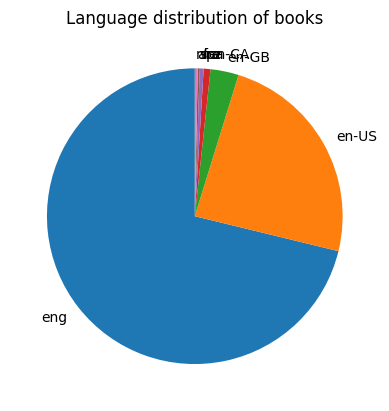

In [115]:

plt.pie(language_counts,labels=language_counts.index,startangle=90)
plt.title("Language distribution of books")

In [116]:
df.groupby("Author_Rating")["Book_ratings_count"].min()

Author_Rating
Excellent       32626
Famous          54977
Intermediate    27308
Novice          42339
Name: Book_ratings_count, dtype: int64

Text(0.5, 1.0, 'Average Rating VS Ratings Count')

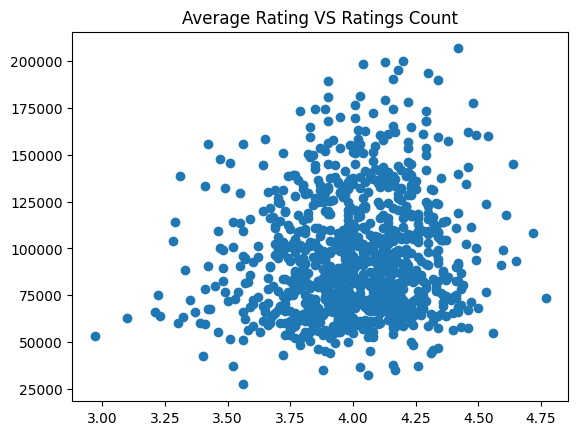

In [117]:
plt.scatter(df['Book_average_rating'],df['Book_ratings_count'])
plt.title("Average Rating VS Ratings Count")

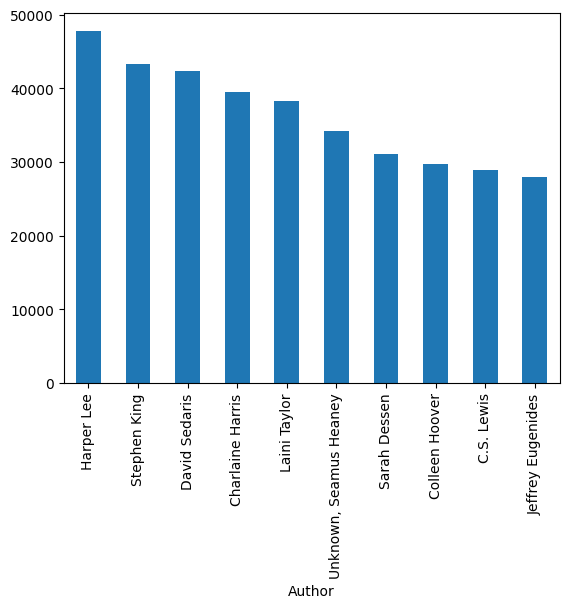

In [123]:
total_gross_sales_by_author = (
    df.groupby("Author")["gross sales"]
      .sum()
      .sort_values(ascending=False)
      .head(10).plot(kind='bar')
)



<Axes: xlabel='Author_Rating', ylabel='units sold'>

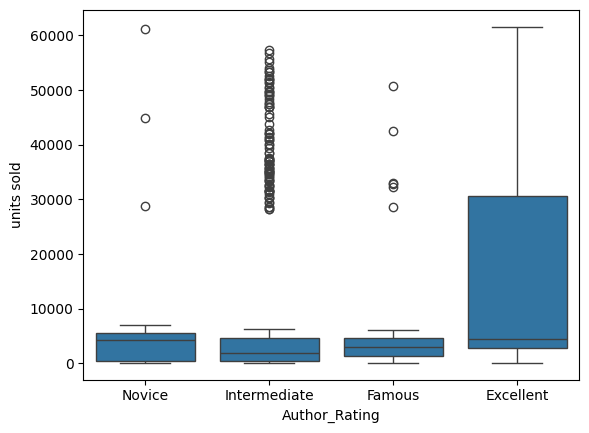

In [127]:
sns.boxplot(x='Author_Rating',y='units sold',data=df)

Text(0.5, 1.0, 'Total Units sold Per Year')

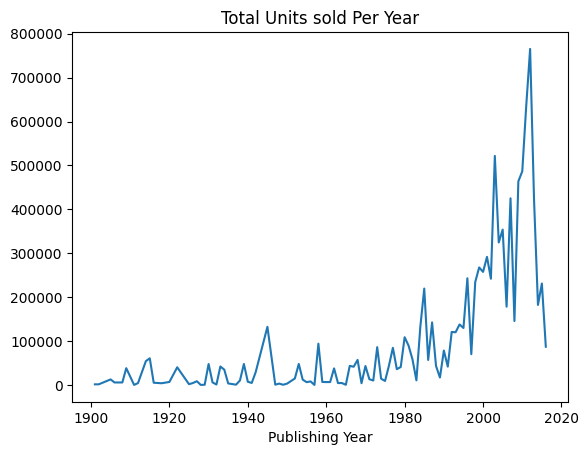

In [129]:
df.groupby('Publishing Year')["units sold"].sum().plot(kind='line')
plt.title('Total Units sold Per Year')